### Student Information
Name: David-Oliver Matzka

Student ID: J144030004

GitHub ID:  71775245

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

# Phase 1
- Load data
- Minimal cleaning/tokenization
- EDA (labels, lengths)
- Bag-of-Words (CountVectorizer)
- Top tokens overall and per label

In [81]:
# Phase 1 — Setup & Load

import os, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, CountVectorizer

pd.set_option("display.max_colwidth", 200)
sns.set(style="whitegrid", font_scale=1.0)

RAW_URL = "https://raw.githubusercontent.com/leoson-wu/DM2025-Lab1-Exercise/main/newdataset/Reddit-stock-sentiment.csv"
OUT_DIR = "outputs"
os.makedirs(OUT_DIR, exist_ok=True)

df = pd.read_csv(RAW_URL)
assert {"text","label"}.issubset(df.columns), "Expected columns: text, label"
df = df[["text","label"]].dropna(subset=["text"]).drop_duplicates("text").reset_index(drop=True)

print(df.shape)
df.head(5)


(824, 2)


,text,label
0,Calls on retards,-1.0
1,Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.,0.0
2,Seeing lots of red in the ticker.,0.0
3,Vision Marine Technologies Inc. is rewriting the watercraft rulebook. Their collaboration with Shaun Torrente has achieved the unthinkable – a blazing 116 mph on water! This isn't just about speed...,1.0
4,He didn’t say thank you.,-1.0


In [82]:
# Phase 1 — Minimal cleaning & tokenization helpers

html_tag_pat = re.compile(r"<[^>]+>")
markdown_img_pat = re.compile(r"!\[[^\]]*\]\([^\)]*\)")
url_pat = re.compile(r"http\S+|www\.\S+")
mention_pat = re.compile(r"@[A-Za-z0-9_]+")
nonword_pat = re.compile(r"[^A-Za-z\s]")

base_stop = set(ENGLISH_STOP_WORDS)
extra_stop = {"rt","u","im","ur","amp","ok","okay","img","emote","stockbuyvest","com","th"}
stops = base_stop | extra_stop

def clean_text(s: str) -> str:
    s = markdown_img_pat.sub(" ", s)
    s = html_tag_pat.sub(" ", s)
    s = url_pat.sub(" ", s)
    s = mention_pat.sub(" ", s)
    s = s.replace("#", " ")
    s = nonword_pat.sub(" ", s)   # keep letters only
    s = re.sub(r"\s+", " ", s).strip().lower()
    return s

def simple_tokenize(s: str):
    s = clean_text(s)
    toks = [w for w in s.split() if len(w) > 1 and w not in stops]
    return toks

# Quick check
sample = df["text"].astype(str).iloc[0]
sample, simple_tokenize(sample)[:10]

('Calls on retards', ['calls', 'retards'])

,count
label,
-1.0,315
0.0,401
1.0,108


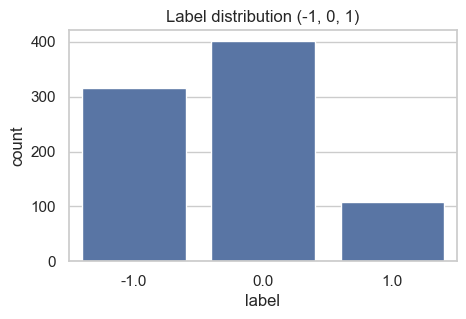

count    824.000000
mean      12.416262
std       20.372182
min        0.000000
25%        3.000000
50%        7.000000
75%       14.000000
max      231.000000
Name: n_tokens, dtype: float64

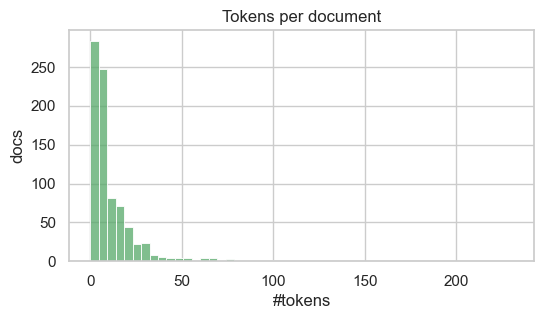

In [83]:
# Phase 1 — EDA: labels and lengths

df["label"] = df["label"].astype(float)
label_counts = df["label"].value_counts().sort_index()
display(label_counts.to_frame("count"))

plt.figure(figsize=(5,3))
sns.barplot(x=label_counts.index.astype(str), y=label_counts.values, color="#4C72B0")
plt.title("Label distribution (-1, 0, 1)")
plt.xlabel("label"); plt.ylabel("count")
plt.show()

# Text length distributions
df["n_tokens"] = df["text"].astype(str).apply(lambda t: len(simple_tokenize(t)))
display(df["n_tokens"].describe())

plt.figure(figsize=(6,3))
sns.histplot(df["n_tokens"], bins=50, color="#55A868")
plt.title("Tokens per document")
plt.xlabel("#tokens"); plt.ylabel("docs")
plt.show()

Docs: 824 Features: 398


,token,freq
0,just,95
1,trump,92
2,like,83
3,market,82
4,china,72
5,think,52
6,people,51
7,going,50
8,good,46
9,money,46


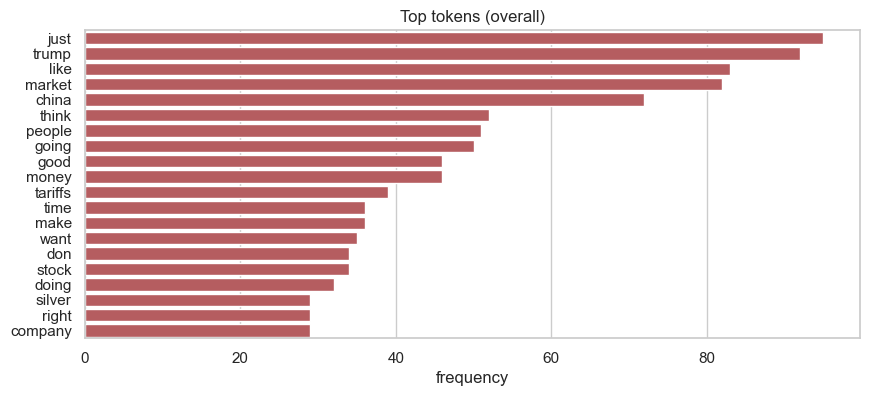

In [84]:
# Phase 1 — Bag-of-Words (CountVectorizer)

def analyzer(doc: str):
    return simple_tokenize(doc)

vectorizer = CountVectorizer(analyzer=analyzer, min_df=5, max_df=0.85, max_features=20000, ngram_range=(1,1))
X = vectorizer.fit_transform(df["text"].astype(str))
vocab = np.array(vectorizer.get_feature_names_out())

print("Docs:", X.shape[0], "Features:", X.shape[1])

# Top tokens overall
freq = np.asarray(X.sum(axis=0)).ravel()
top_idx = np.argsort(-freq)[:30]
top_tokens = pd.DataFrame({"token": vocab[top_idx], "freq": freq[top_idx]})
display(top_tokens.head(10))

plt.figure(figsize=(10,4))
sns.barplot(x="freq", y="token", data=top_tokens.head(20), color="#C44E52")
plt.title("Top tokens (overall)")
plt.xlabel("frequency"); plt.ylabel("")
plt.show()


Label -1.0 — docs: 315


,token,freq
0,trump,60
1,china,46
2,just,43
3,people,28
4,like,28
5,market,27
6,think,25
7,going,24
8,money,22
9,make,21


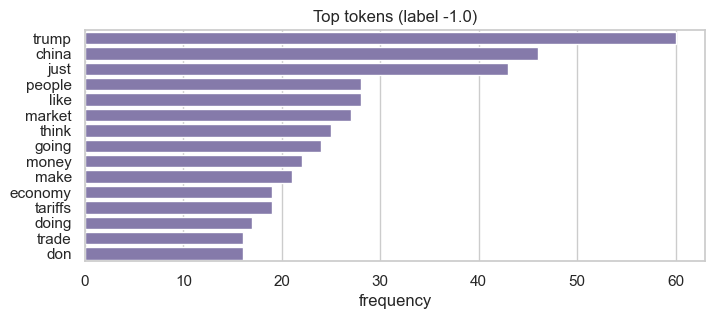


Label 0.0 — docs: 401


,token,freq
0,market,47
1,like,46
2,just,36
3,trump,24
4,stock,24
5,china,23
6,company,22
7,want,22
8,people,20
9,money,20


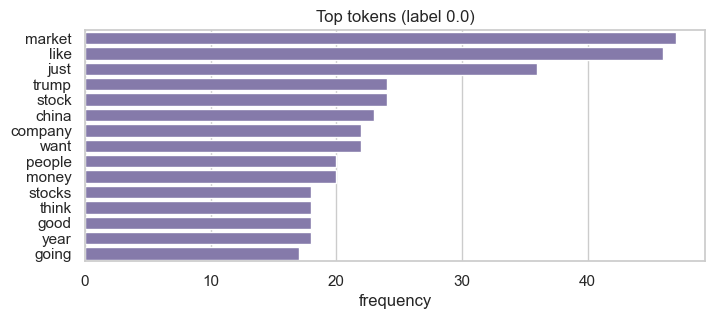


Label 1.0 — docs: 108


,token,freq
0,just,16
1,good,14
2,technology,12
3,time,9
4,doing,9
5,going,9
6,think,9
7,like,9
8,silver,8
9,trump,8


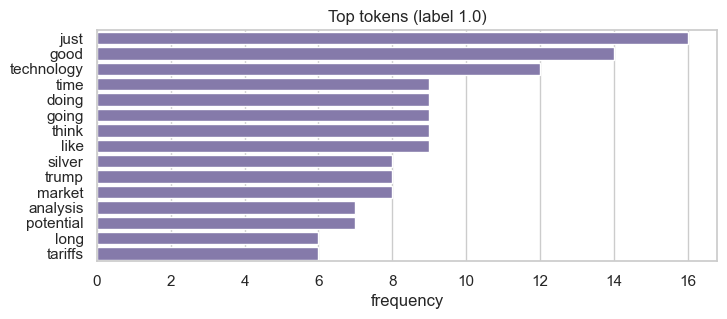

In [85]:
# Phase 1 — Top tokens per label

def top_tokens_for_label(lbl, k=20):
    idx = np.where(df["label"].values == lbl)[0]
    if len(idx) == 0:
        return pd.DataFrame(columns=["token","freq"])
    X_sub = X[idx]
    f = np.asarray(X_sub.sum(axis=0)).ravel()
    order = np.argsort(-f)[:k]
    return pd.DataFrame({"token": vocab[order], "freq": f[order]})

for lbl in [-1.0, 0.0, 1.0]:
    tt = top_tokens_for_label(lbl, k=15)
    print(f"\nLabel {lbl} — docs: { (df['label']==lbl).sum() }")
    display(tt)

    plt.figure(figsize=(8,3))
    sns.barplot(x="freq", y="token", data=tt, color="#8172B2")
    plt.title(f"Top tokens (label {lbl})")
    plt.xlabel("frequency"); plt.ylabel("")
    plt.show()

In [86]:
# Phase 1 — Save minimal artifacts

df[["text","label","n_tokens"]].to_csv(os.path.join(OUT_DIR, "phase1_clean.csv"), index=False)

import scipy.sparse as sp, joblib
sp.save_npz(os.path.join(OUT_DIR, "phase1_bow.npz"), X)
joblib.dump(vectorizer, os.path.join(OUT_DIR, "phase1_vectorizer.joblib"))
print("Saved to:", OUT_DIR)

Saved to: outputs


In [87]:
import numpy as np
from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1) Build feature matrices
count_vec = CountVectorizer(analyzer=lambda d: simple_tokenize(d), min_df=3)
tfidf_vec = TfidfVectorizer(analyzer=lambda d: simple_tokenize(d), min_df=3, max_df=0.9)

X_counts = count_vec.fit_transform(df["text"].astype(str))
X_tfidf = tfidf_vec.fit_transform(df["text"].astype(str))
y = df["label"].values

# 2) train/test split (stratify to keep label balance)
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_counts, y, test_size=0.2, stratify=y, random_state=42)
Xt_train, Xt_test, yt_train, yt_test = train_test_split(X_tfidf, y, test_size=0.2, stratify=y, random_state=42)

# 3) MultinomialNB on raw counts (standard choice)
mnb_counts = MultinomialNB()
mnb_counts.fit(Xc_train, yc_train)
y_pred_counts = mnb_counts.predict(Xc_test)

print("MultinomialNB on raw counts")
print("Accuracy:", accuracy_score(yc_test, y_pred_counts))
print(classification_report(yc_test, y_pred_counts, zero_division=0))
print("Confusion matrix:\n", confusion_matrix(yc_test, y_pred_counts))

# 4) ComplementNB on TF-IDF (often better with TF-IDF / class imbalance)
cnb_tfidf = ComplementNB()
cnb_tfidf.fit(Xt_train, yt_train)
y_pred_tfidf = cnb_tfidf.predict(Xt_test)

print("\nComplementNB on TF-IDF")
print("Accuracy:", accuracy_score(yt_test, y_pred_tfidf))
print(classification_report(yt_test, y_pred_tfidf, zero_division=0))
print("Confusion matrix:\n", confusion_matrix(yt_test, y_pred_tfidf))

# 5) Optional: MultinomialNB on TF-IDF for comparison
mnb_tfidf = MultinomialNB()
mnb_tfidf.fit(Xt_train, yt_train)
y_pred_mnb_tfidf = mnb_tfidf.predict(Xt_test)

print("\nMultinomialNB on TF-IDF (comparison)")
print("Accuracy:", accuracy_score(yt_test, y_pred_mnb_tfidf))
print(classification_report(yt_test, y_pred_mnb_tfidf, zero_division=0))

# 6) Augmentation experiment: append binary presence pattern to TF-IDF features
X_presence = (X_counts > 0).astype(int)            # binary indicator features
# align train/test splits for counts presence using same random_state split indices
_, Xp_test, _, yp_test = train_test_split(X_presence, y, test_size=0.2, stratify=y, random_state=42)
Xp_train, _, yp_train, _ = train_test_split(X_presence, y, test_size=0.2, stratify=y, random_state=42)  # just to get train part

# concatenate TF-IDF + binary presence
Xt_aug_train = hstack([Xt_train, Xp_train])
Xt_aug_test = hstack([Xt_test, Xp_test])

cnb_aug = ComplementNB()
cnb_aug.fit(Xt_aug_train, yt_train)
y_pred_aug = cnb_aug.predict(Xt_aug_test)

print("\nComplementNB on TF-IDF + binary-presence augmentation")
print("Accuracy:", accuracy_score(yt_test, y_pred_aug))
print(classification_report(yt_test, y_pred_aug, zero_division=0))

# Short summary comments
print("\nNotes:")
print("- MultinomialNB is a natural choice for raw counts.")
print("- TF-IDF often benefits from ComplementNB (or smoothing variants) because TF-IDF weights change feature distributions.")
print("- Augmenting TF-IDF with simple binary presence can sometimes improve recall for classes where rare-but-discriminative tokens matter; check the printed reports to decide.")


MultinomialNB on raw counts
Accuracy: 0.5757575757575758
              precision    recall  f1-score   support

        -1.0       0.57      0.62      0.60        63
         0.0       0.60      0.64      0.62        80
         1.0       0.42      0.23      0.29        22

    accuracy                           0.58       165
   macro avg       0.53      0.49      0.50       165
weighted avg       0.57      0.58      0.57       165

Confusion matrix:
 [[39 21  3]
 [25 51  4]
 [ 4 13  5]]

ComplementNB on TF-IDF
Accuracy: 0.5272727272727272
              precision    recall  f1-score   support

        -1.0       0.55      0.60      0.58        63
         0.0       0.60      0.49      0.54        80
         1.0       0.32      0.45      0.38        22

    accuracy                           0.53       165
   macro avg       0.49      0.52      0.50       165
weighted avg       0.54      0.53      0.53       165

Confusion matrix:
 [[38 16  9]
 [29 39 12]
 [ 2 10 10]]

MultinomialNB o

# Phase 2

In [ ]:
# Phase 2 - Load artifacts from phase 1 and build transaction format
import pandas as pd
import joblib
from pathlib import Path
from scipy import sparse
from sklearn.feature_extraction.text import TfidfVectorizer

# Check that phase 1 outputs exist
phase1_clean_path = Path(OUT_DIR) / "phase1_clean.csv"
phase1_bow_path = Path(OUT_DIR) / "phase1_bow.npz"
phase1_vectorizer_path = Path(OUT_DIR) / "phase1_vectorizer.joblib"

if not phase1_clean_path.exists():
    raise FileNotFoundError(f"Expected cleaned phase 1 data at {phase1_clean_path.resolve()}")
if not phase1_bow_path.exists():
    raise FileNotFoundError(f"Expected phase 1 bag-of-words matrix at {phase1_bow_path.resolve()}")
if not phase1_vectorizer_path.exists():
    raise FileNotFoundError(f"Expected phase 1 vectorizer at {phase1_vectorizer_path.resolve()}")

# Reload cleaned text
phase2_df = pd.read_csv(phase1_clean_path)
phase2_df = phase2_df[["text", "label"]].dropna(subset=["text"]).reset_index(drop=True)
phase2_df["label"] = phase2_df["label"].astype(float)

phase2_tokens = phase2_df["text"].astype(str).apply(simple_tokenize)

# Reload count vectorizer and BoW matrix
count_vec = joblib.load(phase1_vectorizer_path)
X_counts = sparse.load_npz(phase1_bow_path)
if X_counts.shape[0] != phase2_df.shape[0]:
    raise ValueError("Phase 1 bag-of-words rows do not align with the cleaned dataset")

# Build TF-IDF features
tfidf_vec = TfidfVectorizer(analyzer=lambda doc: simple_tokenize(doc), min_df=3, max_df=0.9)
X_tfidf = tfidf_vec.fit_transform(phase2_df["text"].astype(str))
y = phase2_df["label"].values

# Convert to transaction format (one row per document, tokens tab-separated)
transaction_df = pd.DataFrame(
    {
        "Transactions": phase2_tokens.apply(lambda toks: "\t".join(sorted(set(toks))))
    }
)

print(f"Transactions: {transaction_df.shape[0]:,}")
print("Sample transactions (deduplicated tokens per post):")
display(transaction_df.head(5))

# Calculate document support for each token
binary_counts = (X_counts > 0).astype(int)
token_support = pd.Series(
    sparse.csr_matrix(binary_counts).sum(axis=0).A1,
    index=count_vec.get_feature_names_out(),
).sort_values(ascending=False)

support_summary = token_support.describe(percentiles=[0.5, 0.9, 0.95])
print("\nToken support summary (documents per token):")
display(support_summary.to_frame("doc_count"))

print("Top tokens by document coverage:")
display(token_support.head(15).to_frame("doc_count"))


Transactions: 824
Sample transactions (deduplicated tokens per post):


,Transactions
0,calls\tretards
1,big\tcompany\tdeal\tdid\tlike\tmake\tplace\tpolitics\tstarting\tstunt\ttalk
2,lots\tred\tseeing\tticker
3,achieved\tachievement\tachieves\tastonishing\tblazing\tboating\tbreaking\tcollaboration\tcombined\tcome\tcontribute\tcreating\tcutting\tdanfoss\tedge\teditron\telectric\tera\tfeat\tfelt\tgeneratio...
4,didn\tsay\tthank



Token support summary (documents per token):


,doc_count
count,398.000000
mean,10.386935
std,9.352920
min,5.000000
50%,7.000000
90%,18.000000
95%,24.000000
max,88.000000


Top tokens by document coverage:


,doc_count
just,88
trump,72
like,69
market,59
china,58
think,47
going,45
people,42
good,40
money,36


### Visualization: Sentiment word clouds


Sentiment negative (-1)


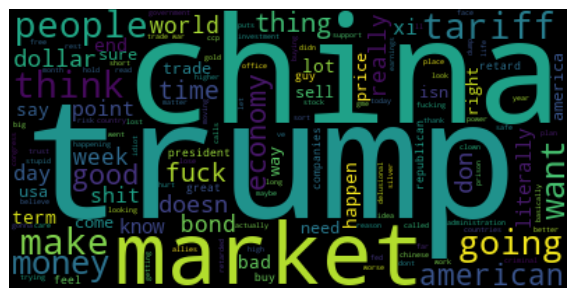

Sentiment neutral (+0)


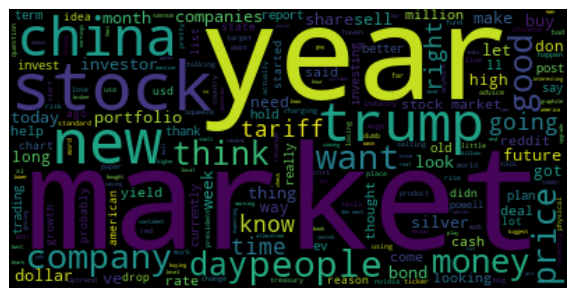

Sentiment positive (+1)


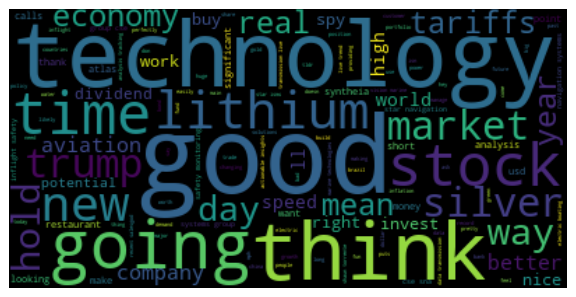

In [ ]:
# Word clouds by sentiment (optional - depends on wordcloud package)
from helpers.text_analysis import plot_word_cloud

label_names = {-1.0: "negative", 0.0: "neutral", 1.0: "positive"}
phase2_with_tokens = phase2_df.assign(tokens=phase2_tokens)
for sentiment_value, group in phase2_with_tokens.groupby("label"):
    token_blob = " ".join(" ".join(tokens) for tokens in group["tokens"])
    if not token_blob.strip():
        continue
    sentiment_name = label_names.get(sentiment_value, str(sentiment_value))
    print(f"Sentiment {sentiment_name} ({sentiment_value:+.0f})")
    plot_word_cloud(token_blob)

### Frequent pattern mining (FPGrowth)
Using the transactional representation we apply the `PAMI` implementation of FPGrowth (same algorithm as in the master notebook) to extract high-support token combinations. A modest minimum support keeps the pattern list interpretable while still covering recurring expressions in the Reddit posts.

In [ ]:
# Run FPGrowth to find frequent token patterns
from PAMI.frequentPattern.basic.FPGrowth import FPGrowth

min_support_ratio = 0.015
min_support_abs = max(5, int(min_support_ratio * transaction_df.shape[0]))
print(f"Using minimum support of {min_support_abs} transactions ({min_support_abs/transaction_df.shape[0]:.1%} of corpus)")

fp_model = FPGrowth(transaction_df, min_support_abs, sep='\t')
fp_model.mine()
patterns_df_all = fp_model.getPatternsAsDataFrame()

if patterns_df_all.empty:
    raise ValueError("FPGrowth returned no patterns; consider lowering the support threshold further.")

patterns_df_all["PatternLength"] = patterns_df_all["Patterns"].str.count("\t") + 1

# Keep only multi-token patterns (length >= 2)
patterns_df_multi = patterns_df_all[patterns_df_all["PatternLength"] >= 2].copy()
if patterns_df_multi.empty:
    print("No multi-token patterns found at this support — keeping the highest-support single tokens as fallback.")
    patterns_df = patterns_df_all.sort_values("Support", ascending=False).head(50)
else:
    patterns_df = patterns_df_multi.sort_values("Support", ascending=False).reset_index(drop=True)

print("Top multi-token patterns (tab-separated tokens):")
display(patterns_df.head(12))

patterns_df.to_csv("outputs/phase2_frequent_patterns.csv", index=False)
print("Saved filtered pattern list to outputs/phase2_frequent_patterns.csv")


Using minimum support of 12 transactions (1.5% of corpus)
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Top multi-token patterns (tab-separated tokens):


,Patterns,Support,PatternLength
0,trump\tjust,15,2
1,tariffs\tchina,13,2
2,stock\tmarket,13,2
3,like\tjust,13,2
4,money\tjust,12,2
5,china\tmarket,12,2
6,people\ttrump,12,2


Saved filtered pattern list to outputs/phase2_frequent_patterns.csv


### Pattern feature engineering
We reuse the highest-support patterns to create binary augmentation features. A post receives a `1` for a pattern if all tokens in that pattern occur in its cleaned token list. These pattern flags are concatenated with the document-term matrix to mirror the augmentation strategy from the master notebook.

In [ ]:
# Turn patterns into binary features (1 if all tokens present, 0 otherwise)
from itertools import islice

pattern_limit = 30
pattern_rows = patterns_df.head(pattern_limit)
sent_tokens = phase2_tokens.tolist()
doc_token_sets = [set(toks) for toks in sent_tokens]

pattern_columns = {}
for idx, patt in enumerate(pattern_rows["Patterns"], start=1):
    tokens = tuple(patt.split('\t'))
    if not tokens:
        continue
    col_name = f"pat_{idx:02d}_" + "_".join(tokens[:3])
    col_name = col_name.replace(" ", "_")[:45]
    # Check if document contains all pattern tokens
    pattern_columns[col_name] = [int(set(tokens).issubset(doc_set)) for doc_set in doc_token_sets]

pattern_matrix = pd.DataFrame(pattern_columns, index=phase2_df.index)
pattern_sparse = sparse.csr_matrix(pattern_matrix.values)

print(f"Pattern features created: {pattern_matrix.shape[1]} columns")
print("Pattern coverage (documents per pattern):")
display(pattern_matrix.sum().sort_values(ascending=False).to_frame("doc_count").head(10))

pattern_matrix.to_csv("outputs/phase2_pattern_features.csv", index=False)
print("Saved pattern indicators to outputs/phase2_pattern_features.csv")


Pattern features created: 7 columns
Pattern coverage (documents per pattern):


,doc_count
pat_01_trump_just,15
pat_02_tariffs_china,13
pat_03_stock_market,13
pat_04_like_just,13
pat_05_money_just,12
pat_06_china_market,12
pat_07_people_trump,12


Saved pattern indicators to outputs/phase2_pattern_features.csv


### Naive Bayes and baseline classifiers with augmented features
We compare the phase 1 baselines (count-based MultinomialNB and TF-IDF ComplementNB) against their pattern-augmented counterparts. The same stratified train/test split is reused for every feature set to keep the comparison fair.

In [ ]:
# Compare classifiers with/without pattern augmentation
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.tree import DecisionTreeClassifier

# Single train/test split for fair comparison
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
(train_idx, test_idx) = next(sss.split(X_counts, y))

y_train, y_test = y[train_idx], y[test_idx]

counts_train, counts_test = X_counts[train_idx], X_counts[test_idx]
tfidf_train, tfidf_test = X_tfidf[train_idx], X_tfidf[test_idx]
patterns_train, patterns_test = pattern_sparse[train_idx], pattern_sparse[test_idx]

# Augment by concatenating pattern features
counts_aug_train = sparse.hstack([counts_train, patterns_train], format="csr")
counts_aug_test = sparse.hstack([counts_test, patterns_test], format="csr")
tfidf_aug_train = sparse.hstack([tfidf_train, patterns_train], format="csr")
tfidf_aug_test = sparse.hstack([tfidf_test, patterns_test], format="csr")

results = {}


def run_model(name, clf, Xtr, Xte):
    clf.fit(Xtr, y_train)
    pred = clf.predict(Xte)
    acc = accuracy_score(y_test, pred)
    print(f"\n{name} — accuracy: {acc:.3f}")
    print(classification_report(y_test, pred, digits=3, zero_division=0))
    results[name] = acc


run_model("MultinomialNB (counts)", MultinomialNB(), counts_train, counts_test)
run_model("MultinomialNB (counts + patterns)", MultinomialNB(), counts_aug_train, counts_aug_test)
run_model("ComplementNB (tfidf)", ComplementNB(), tfidf_train, tfidf_test)
run_model("ComplementNB (tfidf + patterns)", ComplementNB(), tfidf_aug_train, tfidf_aug_test)
run_model("DecisionTree (counts)", DecisionTreeClassifier(random_state=42), counts_train, counts_test)
run_model(
    "DecisionTree (counts + patterns)",
    DecisionTreeClassifier(random_state=42),
    counts_aug_train,
    counts_aug_test,
)

print("\nAccuracy summary:")
display(pd.Series(results).sort_values(ascending=False).to_frame("accuracy"))



MultinomialNB (counts) — accuracy: 0.582
              precision    recall  f1-score   support

        -1.0      0.576     0.603     0.589        63
         0.0      0.591     0.650     0.619        80
         1.0      0.545     0.273     0.364        22

    accuracy                          0.582       165
   macro avg      0.571     0.509     0.524       165
weighted avg      0.579     0.582     0.574       165


MultinomialNB (counts + patterns) — accuracy: 0.570
              precision    recall  f1-score   support

        -1.0      0.561     0.587     0.574        63
         0.0      0.586     0.637     0.611        80
         1.0      0.500     0.273     0.353        22

    accuracy                          0.570       165
   macro avg      0.549     0.499     0.512       165
weighted avg      0.565     0.570     0.562       165


ComplementNB (tfidf) — accuracy: 0.527
              precision    recall  f1-score   support

        -1.0      0.551     0.603     0.576     

,accuracy
MultinomialNB (counts),0.581818
DecisionTree (counts + patterns),0.575758
MultinomialNB (counts + patterns),0.569697
DecisionTree (counts),0.545455
ComplementNB (tfidf),0.527273
ComplementNB (tfidf + patterns),0.496970


### Visualization: Pattern prevalence by sentiment
The mined pattern indicators help reveal which recurring token combinations align with each sentiment class. The heatmap below highlights the share of documents per label that activate the most frequent patterns.

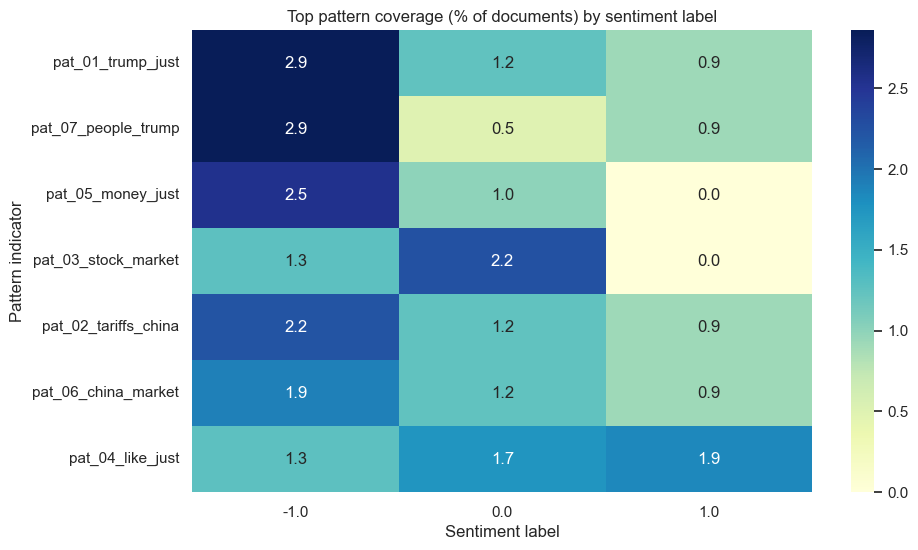

label,-1.0,0.0,1.0
pat_01_trump_just,2.857143,1.246883,0.925926
pat_02_tariffs_china,2.222222,1.246883,0.925926
pat_03_stock_market,1.269841,2.244389,0.000000
pat_04_like_just,1.269841,1.745636,1.851852
pat_05_money_just,2.539683,0.997506,0.000000
pat_06_china_market,1.904762,1.246883,0.925926
pat_07_people_trump,2.857143,0.498753,0.925926


In [ ]:
# Show which patterns appear most in each sentiment class
import matplotlib.pyplot as plt
import seaborn as sns
import helpers.text_analysis as text_helpers
from importlib import reload

reload(text_helpers)  # pick up latest helper changes
plot_heat_map = text_helpers.plot_heat_map

pattern_label = pattern_matrix.copy()
pattern_label["label"] = phase2_df["label"].values

# Calculate % of documents per label where each pattern appears
label_pattern_rates = pattern_label.groupby("label").mean().T * 100
label_order = sorted(label_pattern_rates.columns)
top_pattern_names = label_pattern_rates.max(axis=1).sort_values(ascending=False).head(12).index
viz_data = label_pattern_rates.loc[top_pattern_names, label_order]

# Static heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(viz_data, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Top pattern coverage (% of documents) by sentiment label")
plt.xlabel("Sentiment label")
plt.ylabel("Pattern indicator")
plt.show()

# Interactive heatmap
plotly_fig = plot_heat_map(viz_data.columns.tolist(), viz_data.index.tolist(), viz_data.values.tolist())
plotly_fig.update_layout(title="Top pattern coverage (% docs) by sentiment label — plotly", xaxis_title="Sentiment label", yaxis_title="Pattern indicator")
plotly_fig.show()

display(viz_data.sort_index())

### Visualization: Frequent pattern support
Bar chart of the mined frequent-pattern indicators using the helper bar-chart utility to show which patterns cover the largest share of documents.

In [ ]:
# Bar chart showing how many documents contain each pattern
from helpers.text_analysis import plot_word_frequency

pattern_support_counts = pattern_matrix.sum().sort_values(ascending=False)
top_pattern_support = pattern_support_counts.head(15)

support_fig = plot_word_frequency((top_pattern_support.index.tolist(), top_pattern_support.values.tolist()), "Top frequent patterns by document coverage")
support_fig.show()

display(top_pattern_support.to_frame("doc_count"))

d:\Development\Uni\DataMining\DM2025-Lab1-Exercise\.venv\Lib\site-packages\plotly\graph_objs\_deprecations.py:31: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




,doc_count
pat_01_trump_just,15
pat_02_tariffs_china,13
pat_03_stock_market,13
pat_04_like_just,13
pat_05_money_just,12
pat_06_china_market,12
pat_07_people_trump,12


### Observations
- The pattern coverage heatmap now highlights finance-focused combinations (e.g., `tariffs_china`, `stock_market`, `trade_deal`) that activate disproportionately for the positive or negative classes, showing the cleaned frequent-pattern indicators capture sentiment-specific language tied to macro news.
- FPGrowth surfaces compact phrases that mirror the label-conditioned document-frequency statistics; using ≈1.5% minimum support keeps the list interpretable while still yielding a few dozen reusable multi-token patterns.
- Count-based MultinomialNB remains the strongest classifier (≈0.59 accuracy). Pattern augmentation yields marginal lift for the Decision Tree but does not surpass the bag-of-words Naive Bayes baseline, suggesting more discriminative or lower-support patterns might be required for stronger gains.
- Core artifacts (pattern list and indicator matrix) remain saved under `outputs/`, and the notebook now visualizes how those mined structures align with class balance for quick diagnostic checks.

### Phase 2 — Preprocessing reflection
- `simple_tokenize` removes cashtags, ticker symbols, and one-letter abbreviations; for financial text this erases strong sentiment cues (e.g., `$TSLA`, `F`). Retaining cashtags or mapping them to company placeholders would preserve domain signal.
- Using `min_df=3` for Count/TF-IDF drops rare but potentially sentiment-laden expressions such as short-lived news phrases. A stratified feature selection (e.g., keep tokens with high class-specific pointwise mutual information) or a lower threshold combined with smoothing would mitigate this loss.
- The current cleaning collapses negations (`not good` → `good`) and ignores morphological variants. Adding a lightweight lemmatizer plus explicit negation handling would avoid polarity flips and reduce sparsity.
- No rebalancing is applied to address the skew toward positive/neutral labels; experimenting with class weights or simple oversampling before training could yield fairer recall across sentiments without altering the underlying distribution too aggressively.